# Graph Isomorphism Problem
*Chayapol "Due" Hongsrimuang - G00388741*

---

When describing a **graph**, it can be described as a 2-tuple of (N, E) where N is a set of nodes, and E is a set of 2-subsets of N, known as edges. These edges connect the nodes together to form a graph relationship.

**Graph Isomorphism Problem** (or GI, for short) concerns two finite graphs, whether they are isomorphic or not. A graph is **isomorphic** when the graph can have more than one form, with:

* the same number of edges,
* the same number of nodes, 
* each node has the same number of degree as its exact same node in another graph
* a bijection that when one node is linked to another node in another graph, that link equates to one exists in the edges of both graphs

In this case, **Graph Isomorphism Problem** involves how to determine if the graphs are isomorphic or not, fulfilling conditions above. This would involve making combinations of bijections to determine the isomorphic nature of the graphs. The combinations make would increase in a factorial number, depending on the amount of nodes, (e.g. 5 nodes will have 5! possible combinations) if done in a brute force method.

## Determining the Isomorphic Nature
To determine the isomorphic nature, let's set an example of a simple 3 node graph, and its isomorphic graph.

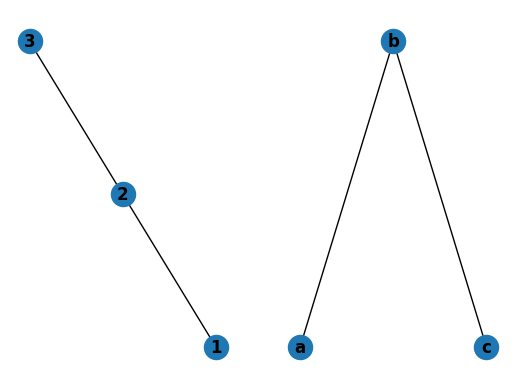

In [1]:
# Do "pip install networkx" and "pip install matplotlib" first to get the full functionalities 
import networkx as nx
import matplotlib.pyplot as plt

# First Graph
G = nx.Graph()
GE = [(1, 2), (2, 3)] # Add edges

G.add_nodes_from([
    (1, {"color": "red"}),
    (2, {"color": "green"}),
    (3, {"color": "blue"})
])
G.add_edges_from(GE)

# Second Graph
H = nx.Graph()
HE = [("a", "b"), ("b", "c")]

H.add_nodes_from([
    ("a", {"color": "red"}),
    ("b", {"color": "green"}),
    ("c", {"color": "blue"})
])

H.add_edges_from(HE)

subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_spectral(H, with_labels=True, font_weight='bold')

The graphs are examined first with the two conditions: the same number of edges, and the same number of nodes

In [2]:
# Same number of nodes
len(list(G.nodes)) == len(list(H.nodes))

True

In [3]:
# Same number of edges
len(list(G.edges)) == len(list(H.edges))

True

As seen in those code above, the nodes and edges have the same numbers of nodes and edges. With this, we can move on to determining the isomorphic nature via analysing each combination of the graphs relationship.

In [4]:
import itertools as it

# Firstly, we will need to get all the permutations of another graph, in this case, H.
HP = list(it.permutations(list(H.nodes),len(H.nodes)))

HP

[('a', 'b', 'c'),
 ('a', 'c', 'b'),
 ('b', 'a', 'c'),
 ('b', 'c', 'a'),
 ('c', 'a', 'b'),
 ('c', 'b', 'a')]

In [5]:
# Then, map each permutation with the nodes from the previous graph, G
def get_dictionary_permutation(permutation):
    for i in range(len(permutation)):
        permutation[i] = dict(zip(permutation[i],G.nodes))
    return permutation

HP = get_dictionary_permutation(HP)
HP

[{'a': 1, 'b': 2, 'c': 3},
 {'a': 1, 'c': 2, 'b': 3},
 {'b': 1, 'a': 2, 'c': 3},
 {'b': 1, 'c': 2, 'a': 3},
 {'c': 1, 'a': 2, 'b': 3},
 {'c': 1, 'b': 2, 'a': 3}]

In [6]:
# After which, subsitute the edges for each possible permutations with the ones from dictionary above
def get_final_permutations(permutation, edge):
    final_list = list()
    for i in range(len(permutation)): # Run through each permutation
        permutation_tuple = list()
        for j in range(len(edge)): # Run through each edge
            permutation_each = list()
            for k in range(len(edge[j])): # For each node in an edge
                permutation_each.append(permutation[i][edge[j][k]]) # Subsitute graph H with Graph G
            permutation_tuple.append(tuple(permutation_each))
        final_list.append(permutation_tuple)
    return final_list

HR = get_final_permutations(HP, HE)
HR

[[(1, 2), (2, 3)],
 [(1, 3), (3, 2)],
 [(2, 1), (1, 3)],
 [(3, 1), (1, 2)],
 [(2, 3), (3, 1)],
 [(3, 2), (2, 1)]]

In [7]:
# Compare each edges for each permutation to the one in the previous graph (G)
def check_bijections_isomorphism(final_permutation, other_edge):
    for i in range(len(final_permutation)):
        if (final_permutation[i] == other_edge): # If a permutation of edges is the same as with the previous graph's edges, print out the message
            print("Isomorphism found.")
            break
        elif (i == len(final_permutation)-1):
            print("Isomorphism not found.")

check_bijections_isomorphism(HR, GE)

Isomorphism found.


As seen above, graph isomorphism is found in a relatively simple graph. Here's a more complicated example, with more edges, and more nodes:

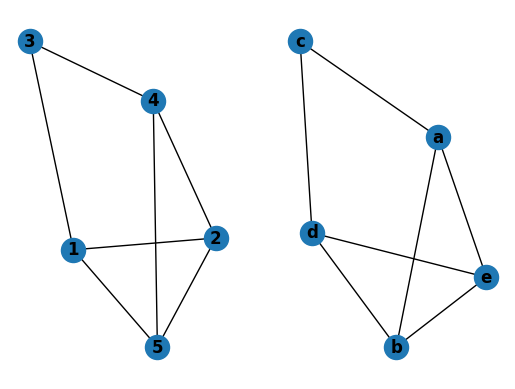

In [8]:
# First Graph
G = nx.Graph()
GE = [(1, 2), (2, 5), (2, 4), (1, 3), (3, 4), (1, 5), (4, 5)] # Add edges

G.add_nodes_from([
    (1, {"color": "red"}),
    (2, {"color": "green"}),
    (3, {"color": "blue"}),
    (4, {"color": "yellow"}),
    (5, {"color": "purple"})
])
G.add_edges_from(GE)

# Second Graph
H = nx.Graph()
HE = [("a", "b"), ("b", "e"), ("b", "d"), ("a", "c"), ("c", "d"), ("a", "e"), ("d", "e")]

H.add_nodes_from([
    ("a", {"color": "red"}),
    ("b", {"color": "green"}),
    ("c", {"color": "blue"}),
    ("d", {"color": "yellow"}),
    ("e", {"color": "purple"})
])

H.add_edges_from(HE)

subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw(H, with_labels=True, font_weight='bold')

In [9]:
# First determine the amount of edges and nodes if they are the same with each other or not
# Same number of nodes
print(len(list(G.nodes)) == len(list(H.nodes)))

# Same number of edges
print(len(list(G.edges)) == len(list(H.edges)))

# Then, create permutations for the H graph to compare with the other graph, G, 
# to see if one of the permutation has bijections that are the same as with each other
HP = list(it.permutations(list(H.nodes),len(H.nodes)))
HP = get_dictionary_permutation(HP)
HR = get_final_permutations(HP, HE)
check_bijections_isomorphism(HR, GE)

True
True
Isomorphism found.


Now, these graphs are still isomorphic, but if we take a look at the length of the permutations:

In [10]:
len(HP)

120

The length significantly increased from when there's only 3 nodes. This is because the graphs would have to be permutated for every possible permutations of bijections that can occur for each graph. This is really a problem in runtime, as this is deemed as a brute force method, and that there's no shortcuts to this, even when trying to solve to a polynomial time. (one of the fastest runtime for executing a method)

Therefore, with the code above, the runtime for the code is around `N!` considering the entire code as a whole, which can be significant when it is plotted on a graph below. (comparing factorial and linear graph)

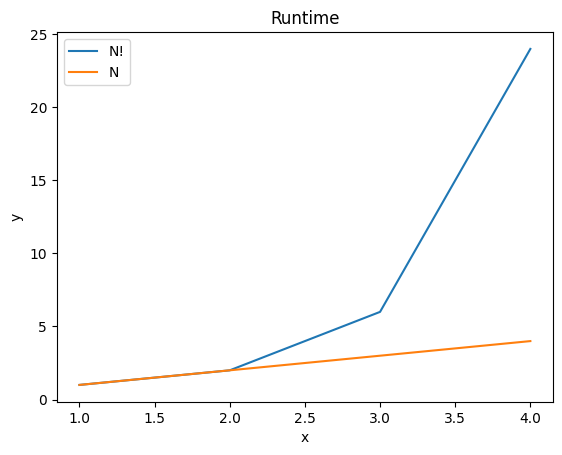

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# generate x values
x = list(range(1, 5))
# generate factorial values
factorial = list()
for num in x:
    factorial.append(np.math.factorial(num))

# Plot the graphs
plt.plot(x, factorial, label='N!')
plt.plot(x, x, label='N')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Runtime')
plt.show()


## Attempts for Practical Algorithms for Graph Isomorphism
There are attempts to make this algorithm more efficient. Take Stoichev's attempts as an example, where five new algorithms (all known as Vseps) are introduced. One particular algorithm, Vsep-is, is used for graph isomorphism. 

However, their worst case is still exponential time of ${2^N}$, which is still significant when compared to polynomial time or even linear time, as it compares every nodes of the graphs themselves.

There are also some attempts to tackle to this problem by randomly permuting a graph and then perform the check in a certain amount of attempt, however, there is a probability of the program used to be incorrect of around ${2^{-x}}$ where x is the amount of attempts to determine the isomorphic nature of the graphs. Therefore, it is much more reliable to go through all the permutations of the graphs.

Throughout researches and countless algorithms, it was deduced that the best running time (other than the ones described above) is in quasipolynomial time. (${log^3n}$). One such algorithm is the **László Babai algorithm**. The strategy is to break the graph to smaller instances using canonical colouring/equipartition (colouring vertices of the same degree and same neighbours) Then, compare the colours to see if they correspond to each other. This approach helps reduce the amount of checks required to prove that the graphs are isomorphic, and therefore, reduce the runtime to be in quasipolynomial time.

The worst case scenarios for the runtime above is ${2^{O(log^Cn)}}$ for some fixed ${c > 0}$. This runtime is faster than exponential time, but slower than polynomial time. The current problem of solving the graph isomorphism problem is to find a way to solve the graph isomorphism problem in polynomial time. 

Therefore, this problem is considered to be in class **NP-Complete** (not solvable in polynomial time), but still is aimed to solved in class P (solved in polynomial time)

## Special Solved Cases
Despite the problem not being able to be solved in polynomial time (or similar) efficiently, there are however some special cases in regards to some specific graph types. These graphs are known to be solved in a much more efficient way than the one described above.

### Trees
A tree is a graph in which there is always a "root" node containing all possible paths to each branch of the graph. In which, all the subsequent nodes are connected only in a path, leading either down the path or going back to the root node. If any of the nodes are removed, then the graphs would be disconnected to each other. In this type of graph, the edges amount is exactly `n-1` in which `n` is the amount of nodes present in the graph itself.

Graph isomorphism in this type of graph can easily be determined by:
* Comparing the amount of nodes and edges
* Finding the root nodes of the graphs (the one that has more than 2 edges connected.)
    * If there is a graph with more than one node that has more than 2 edges connected, the graph is not a tree, and therefore not isomorphic compared to another graph.
* Find the amount of branches in the graph (from the root node's edges) and determine how deep each branch goes. If the number is exactly the same as one another, then it could be determined that the graphs are isomorphic.

It is relatively a simpler approach when it comes to determining the isomorphic nature of the graph and much more efficient, as they do not go through every single nodes in the graphs themselves, compared to random graph examples like above.

### Planar Graphs
Planar graphs area graphs that are known to not have their edges crosses with each other, and only intersects with their nodes. Examples of these graphs are butterfly graphs and K<sub>4</sub> complete graphs.

These graphs follow the Euler's formula: ${v-e+f=2}$, where ${v}$ is the number of nodes, ${e}$ is the number of edges, and ${f}$ is the number of faces. These faces are determined by the region bounded by edges.

To determine that these graphs are isomorphic, alongside fulfilling the conditions for isomorphic graphs above, it also has to match with the formula as well. However, this can be done in linear time of `N(V)` where V is the number of nodes of the graph, as with the nature of the graph itself.



### Circulant Graphs
Circulant graphs are graphs in which the graph has an adjacency matrix of a circulant matrix. This matrix has a specific property in which each row is shifted by one to the right, until it fulfills the matrix itself.

As an example, here is a 5x5 circular matrix,
$${ \begin{bmatrix} 5 & 4 & 3 & 2 & 1 \\ 1 & 5 & 4 & 3 & 2 \\ 2 & 1 & 5 & 4 & 3 \\ 3 & 2 & 1 & 5 & 4 \\ 4 & 3 & 2 & 1 & 5\end{bmatrix}}$$
Each row is a circular shift of a previous row, until the first input matches the last input of the matrix (that being 5 for the matrix above)

Isomorphism can easily be determined by the same amounts of edges and nodes, as well as having the same adjacency matrix with each other as well. This graphs can be recognised by polynomial time, which therefore solving the graph isomorphism problem for this special type of graph.

## Applications
Graph isomorphism problem is used in a wide range of technologies that are still in use today, dominantly in computer vision and pattern recognition, in which, similar to graphs, this technology is used to match the patterns of an image to a patttern determined by the user. This same exact concept is used in chemistry as well, to determine the chemical compound by its molecular graph as well as in biochemistry, where graphs are relatively complex with each other. 

Therefore, to ease the work that is used in those categories, this problem is still an on-going research to find out a way to make these more efficient.

## References
* McLoughlin, I. (2023) Graphs, Groups, and Isomorphisms. Available at: https://github.com/ianmcloughlin/graphs-groups-and-isomorphisms/blob/main/graphs-groups-and-isomorphisms.pdf.
* Krena, I.B. (2001), The Graph Isomorphism Problem. Available at: http://www.fit.vutbr.cz/~krena/prace/stc2001.pdf. 
* Stoichev, Stoicho D. (2019), "New Exact and Heuristic Algorithms for Graph Automorphism Group and Graph Isomorphism", Journal of Experimental Algorithmics (JEA), 24: 1–27.
* Babai, L. (2016) “Graph isomorphism in quasipolynomial time [extended abstract],” Proceedings of the forty-eighth annual ACM symposium on Theory of Computing [Preprint]. Available at: https://doi.org/10.1145/2897518.2897542. 
* Graph theory - isomorphism (no date) Tutorials Point. Available at: https://www.tutorialspoint.com/graph_theory/graph_theory_isomorphism.htm. 
* Circulant-Matrices (2017). Available at: https://web.mit.edu/18.06/www/Spring17/Circulant-Matrices.pdf. 

---

End of notebook